<a href="https://colab.research.google.com/github/PuruBhatnagar1197/all-brainstorming/blob/main/takehome_stripe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_product=df=pd.read_csv(r"/content/product_usage.csv")[['Merchant','Date','Product','Event','Count of events','Usd Amount']]
df_segment=df=pd.read_csv(r"/content/segmentation.csv")

In [ ]:
df_product.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount
0,282t1vpldi,01-01-2013,Basic API,Charge,33,329967.0
1,282t1vpldi,01-02-2013,Basic API,Charge,17,169983.0
2,282t1vpldi,01-03-2013,Basic API,Charge,20,199980.0
3,282t1vpldi,01-04-2013,Basic API,Charge,21,209979.0
4,282t1vpldi,01-05-2013,Recurring,Subscription.Charge,23,229977.0


In [ ]:
df_segment.shape

(33, 2)

In [ ]:
df_product.info(), df_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Merchant         1252 non-null   object 
 1   Date             1252 non-null   object 
 2   Product          1252 non-null   object 
 3   Event            1252 non-null   object 
 4   Count of events  1252 non-null   int64  
 5   Usd Amount       598 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 58.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Merchant  33 non-null     object
 1   Segment   33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


(None, None)

In [ ]:
set(df_product.Merchant.unique())-set(df_segment.Merchant.unique())

set()

In [ ]:
df_combined=df_product.merge(df_segment, on='Merchant', how='left')

In [ ]:
df_combined['Date']=pd.to_datetime(df_combined['Date'], format='%d-%m-%Y').dt.date

In [ ]:
df_combined.columns.to_list()

['Merchant',
 'Date',
 'Product',
 'Event',
 'Count of events',
 'Usd Amount',
 'Segment']

In [ ]:
df_combined.select_dtypes(include='object')

,Merchant,Date,Product,Event,Segment
0,282t1vpldi,2013-01-01,Basic API,Charge,SaaS
1,282t1vpldi,2013-02-01,Basic API,Charge,SaaS
2,282t1vpldi,2013-03-01,Basic API,Charge,SaaS
3,282t1vpldi,2013-04-01,Basic API,Charge,SaaS
4,282t1vpldi,2013-05-01,Recurring,Subscription.Charge,SaaS
...,...,...,...,...,...
1247,zz8yi2lz0k9,2014-08-01,Cart,Cart.ViewItem,E-Commerce Store
1248,zz8yi2lz0k9,2014-09-01,Cart,Cart.ViewItem,E-Commerce Store
1249,zz8yi2lz0k9,2014-10-01,Cart,Cart.ViewItem,E-Commerce Store
1250,zz8yi2lz0k9,2014-11-01,Cart,Cart.ViewItem,E-Commerce Store


In [ ]:
for i in df_combined.select_dtypes(include='object').columns.to_list():
    print(i,df_combined[i].value_counts())

Merchant Merchant
zz8yi2lz0k9    96
wzimmlvj9k9    96
w1x4pumobt9    96
nsoxg9fi529    96
wtnlnqrrudi    84
fix7e4xtj4i    80
8kkxv1xxbt9    68
rczsldz33di    68
9vd51p2e29     56
tgiaz41jor     52
yadjx8estt9    48
2x5fpa2a9k9    25
awzc15rk9      25
r1aca4z33di    24
q5o0270t3xr    24
obpa1e89f6r    24
282t1vpldi     24
hkw5486w29     24
3r5r60f6r      24
hu22wwpcik9    24
4p36czyqfr     22
gtey5htzkt9    20
c5dxqolxr      20
5ellnhilik9    20
ctow2fenrk9    19
50zxrqc9pb9    19
u9nzlgqr529    17
jrb04vuc8fr    14
39rrckrzfr     13
a9jszcl3di     12
jstcqq9qkt9     9
m6jyvblc8fr     6
lv6bu51att9     3
Name: count, dtype: int64
Date Date
2014-12-01    71
2014-11-01    71
2014-10-01    71
2014-09-01    67
2014-08-01    67
2014-04-01    63
2014-07-01    63
2014-06-01    62
2014-05-01    62
2014-01-01    62
2014-02-01    61
2014-03-01    61
2013-12-01    57
2013-11-01    53
2013-10-01    48
2013-09-01    47
2013-08-01    47
2013-06-01    39
2013-07-01    38
2013-05-01    35
2013-04-01  

In [ ]:
df_combined.shape

(1252, 7)

In [ ]:
df_combined.pivot_table(values='Merchant', columns='Segment',index='Date',aggfunc='nunique')

Segment,E-Commerce Store,Platform,SaaS
Date,,,
2013-01-01,4,6,3
2013-02-01,4,6,3
2013-03-01,4,7,3
2013-04-01,5,7,3
2013-05-01,6,7,4
2013-06-01,6,8,6
2013-07-01,6,8,6
2013-08-01,8,9,6
2013-09-01,8,9,6


<Axes: xlabel='Date'>

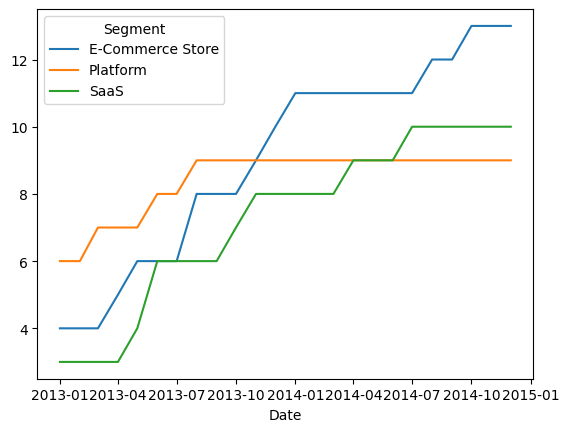

In [ ]:
df_combined.pivot_table(values='Merchant', columns='Segment',index='Date',aggfunc='nunique').plot()

<Axes: xlabel='Date'>

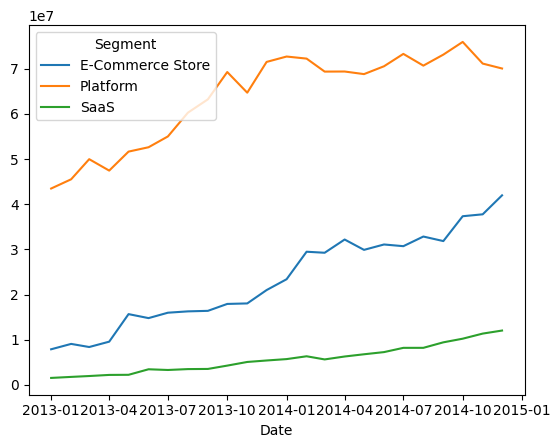

In [ ]:
df_combined.pivot_table(values='Usd Amount', columns='Segment',index='Date',aggfunc='sum').plot()

In [ ]:
df_combined.pivot_table(values='Usd Amount', columns='Segment',index='Date',aggfunc='sum')

Segment,E-Commerce Store,Platform,SaaS
Date,,,
2013-01-01,7869838.0,43473945.0,1525648.0
2013-02-01,9059848.0,45517985.0,1751526.0
2013-03-01,8370091.0,49972974.0,1946007.0
2013-04-01,9555599.0,47443666.0,2190283.0
2013-05-01,15656911.0,51649019.0,2215787.0
2013-06-01,14772697.0,52616022.0,3441172.0
2013-07-01,15969437.0,55008693.0,3284893.0
2013-08-01,16265668.0,60270559.0,3480223.0
2013-09-01,16381478.0,63229930.0,3515563.0


<Axes: xlabel='Date'>

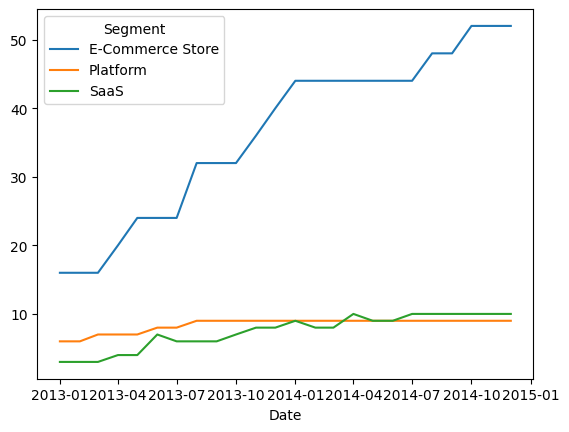

In [ ]:
df_combined.pivot_table(values='Product', columns='Segment',index='Date',aggfunc='count').plot()

In [ ]:
df_combined.pivot_table(columns='Product',index='Segment',aggfunc='size')

Product,Basic API,Cart,Marketplaces,Recurring
Segment,,,,
E-Commerce Store,NaN,872.0,NaN,NaN
Platform,NaN,NaN,202.0,NaN
SaaS,78.0,NaN,NaN,100.0


In [ ]:
df_combined[df_combined['Segment']=='Platform']['Event'].unique()

array(['Marketplace.Charge'], dtype=object)

In [ ]:
df_combined.pivot_table(index='Segment',columns='Event', aggfunc='size')

Event,Cart.AddItem,Cart.Checkout,Cart.PaymentSubmit,Cart.ViewItem,Charge,Marketplace.Charge,Subscription.Charge
Segment,,,,,,,
E-Commerce Store,218.0,218.0,218.0,218.0,NaN,NaN,NaN
Platform,NaN,NaN,NaN,NaN,NaN,202.0,NaN
SaaS,NaN,NaN,NaN,NaN,78.0,NaN,100.0


In [ ]:
df_combined[(pd.isnull(df_combined['Usd Amount']))]['Segment'].unique(),df_combined[(pd.isnull(df_combined['Usd Amount']))]['Event'].unique()

(array(['E-Commerce Store'], dtype=object),
 array(['Cart.AddItem', 'Cart.Checkout', 'Cart.ViewItem'], dtype=object))

In [ ]:
df_combined.groupby(['Merchant']).agg({"Usd Amount":"sum"}).sort_values(by='Usd Amount',ascending=False)

,Usd Amount
Merchant,
r1aca4z33di,409616062.0
obpa1e89f6r,383509178.0
q5o0270t3xr,298034445.0
hkw5486w29,233749171.0
w1x4pumobt9,154980339.0
fix7e4xtj4i,143834893.0
2x5fpa2a9k9,76402359.0
hu22wwpcik9,73520508.0
4p36czyqfr,67807666.0


In [ ]:
df_combined[df_combined['Merchant']=='r1aca4z33di']['Product'].unique()

array(['Marketplaces'], dtype=object)

In [ ]:
df_combined[df_combined['Merchant']=='r1aca4z33di']['Segment'].unique()

array(['Platform'], dtype=object)